In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
import seaborn as sns
from xgboost import XGBRegressor, XGBRFRegressor, plot_importance, XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split

plt.rc('font', size=13)

pd.set_option('mode.chained_assignment', None)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
'''
컬럼별 설명

Passenger ID
각 승객의 고유 ID입니다.

고향 행성 : HomePlanet
승객이 출발한 행성, 일반적으로 영구 거주 행성입니다.

냉동 수면 : CryoSleep
승객이 항해 기간 동안 냉동수면을 일시 중단하도록 선택했는지 여부를 나타냅니다.

선실 : Cabin
승객이 머물고 있는 객실 번호입니다.

목적지 : Destination
승객이 도착할 행성입니다.

나이 : Age
승객의 나이. ( 나이별로 누가누가 살았는지 알아볼 필요 있음 )

요인 : Vip
승객이 항해 중 특별 VIP 서비스 비용을 지불했는지 여부.

룸 서비스 : RoomService
승객이 룸서비스에 대해 청구한 금액입니다. -> 청구한 금액과 VIP의 연관성이 어느정도 일지 이 변수 포함 아래 45 변수 탐색

푸드 코트 : FoodCourt
승객이 푸드 코트에서 청구한 금액입니다. -

쇼핑몰 : ShoppingMall
승객이 쇼핑몰에서 청구한 금액입니다. -

온천
승객이 스파에서 청구한 금액입니다. -

VR덱
승객이 VR 데크에서 청구한 금액입니다. -

이름
승객의 이름입니다. -> 가족끼리의 생존 여부 연관성 탐색 ( 가족끼리는 서로 살리면서 같이 살아있을 확률이 높다 )

운송
승객이 다른 차원으로 운송되었는지 여부.
'''

'\n컬럼별 설명\n\nPassenger ID\n각 승객의 고유 ID입니다.\n\n고향 행성 : HomePlanet\n승객이 출발한 행성, 일반적으로 영구 거주 행성입니다.\n\n냉동 수면 : CryoSleep\n승객이 항해 기간 동안 냉동수면을 일시 중단하도록 선택했는지 여부를 나타냅니다.\n\n선실 : Cabin\n승객이 머물고 있는 객실 번호입니다.\n\n목적지 : Destination\n승객이 도착할 행성입니다.\n\n나이 : Age\n승객의 나이. ( 나이별로 누가누가 살았는지 알아볼 필요 있음 )\n\n요인 : Vip\n승객이 항해 중 특별 VIP 서비스 비용을 지불했는지 여부.\n\n룸 서비스 : RoomService\n승객이 룸서비스에 대해 청구한 금액입니다. -> 청구한 금액과 VIP의 연관성이 어느정도 일지 이 변수 포함 아래 45 변수 탐색\n\n푸드 코트 : FoodCourt\n승객이 푸드 코트에서 청구한 금액입니다. -\n\n쇼핑몰 : ShoppingMall\n승객이 쇼핑몰에서 청구한 금액입니다. -\n\n온천\n승객이 스파에서 청구한 금액입니다. -\n\nVR덱\n승객이 VR 데크에서 청구한 금액입니다. -\n\n이름\n승객의 이름입니다. -> 가족끼리의 생존 여부 연관성 탐색 ( 가족끼리는 서로 살리면서 같이 살아있을 확률이 높다 )\n\n운송\n승객이 다른 차원으로 운송되었는지 여부.\n'

In [4]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
train.isnull().sum()  # 이 값을 참고해서 내가 사용할 컬럼 설정 및 가설 생성 후 전처리

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train['HomePlanet'].isnull().sum()  # 여기서 null 부분은 데이터 흐름상 어떻게 처리할지 고민
# 각 null 값 벌로 특성 상 의미를 찾고 해결하기

201

In [7]:
# 우선 여기서 필요한 컬럼들을 추출하는 작업을 하고 그 다음에 dummies 화를 시켜보자

In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train['Transported'].value_counts()  # 분포가 거의 비슷함

True     4378
False    4315
Name: Transported, dtype: int64

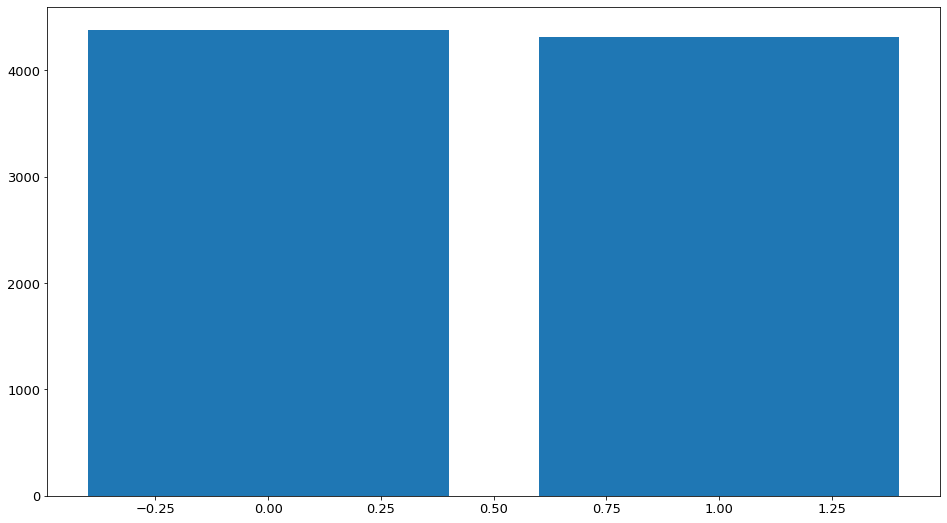

In [10]:
# 가장 먼저 transported의 분포를 알아보자

p_trans = train['Transported']

plt.figure(figsize=(16, 9))
plt.bar(p_trans.unique(), p_trans.value_counts())
plt.show()

In [11]:
train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

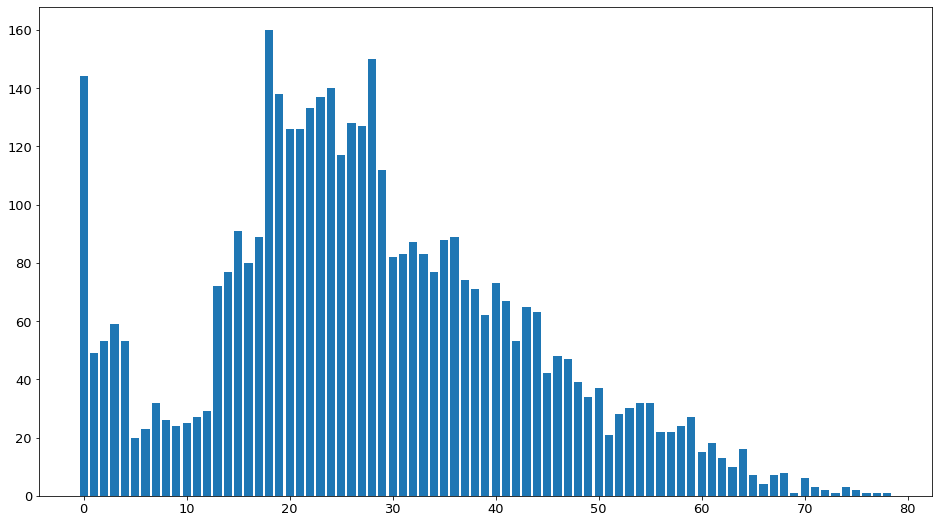

     Age  Transported
78  78.0            1
77  77.0            1
69  69.0            1
73  73.0            1
76  76.0            1
72  72.0            2
75  75.0            2
71  71.0            3
74  74.0            3
66  66.0            4
     Age  Transported
18  18.0          160
28  28.0          150
0    0.0          144
24  24.0          140
19  19.0          138
23  23.0          137
22  22.0          133
26  26.0          128
27  27.0          127
21  21.0          126


In [12]:
# transported의 살아남은 사람 분포

train_trans_true = train[train['Transported'] == True]

p_trans_t = train_trans_true.groupby('Age')['Transported'].count().reset_index()

plt.figure(figsize=(16, 9))
plt.bar(p_trans_t['Age'], p_trans_t['Transported'])
plt.show()

print(p_trans_t.sort_values(by='Transported').head(10))
print(p_trans_t.sort_values(by='Transported', ascending=False).head(10))

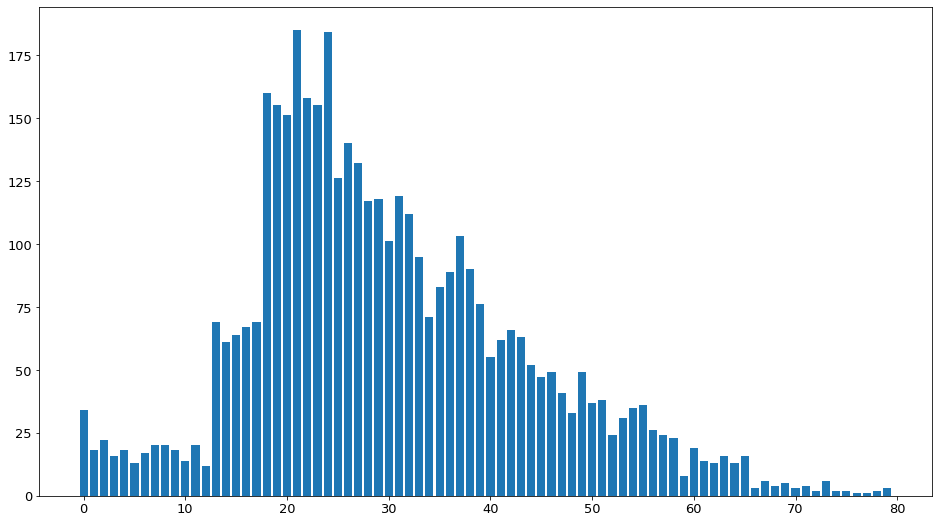

     Age  Transported
76  76.0            1
77  77.0            1
78  78.0            2
72  72.0            2
74  74.0            2
75  75.0            2
66  66.0            3
70  70.0            3
79  79.0            3
71  71.0            4
     Age  Transported
21  21.0          185
24  24.0          184
18  18.0          160
22  22.0          158
19  19.0          155
23  23.0          155
20  20.0          151
26  26.0          140
27  27.0          132
25  25.0          126


In [13]:
# transported의 죽은 사람 분포

train_trans_false = train[train['Transported'] == False]

p_trans_f = train_trans_false.groupby('Age')['Transported'].count().reset_index()

plt.figure(figsize=(16, 9))
plt.bar(p_trans_f['Age'], p_trans_f['Transported'])
plt.show()

print(p_trans_f.sort_values(by='Transported').head(10))
print(p_trans_f.sort_values(by='Transported', ascending=False).head(10))


# 어린이는 죽은 분포가 적고 산 분포가 많다 어린이를 살렸을 확률이 높음

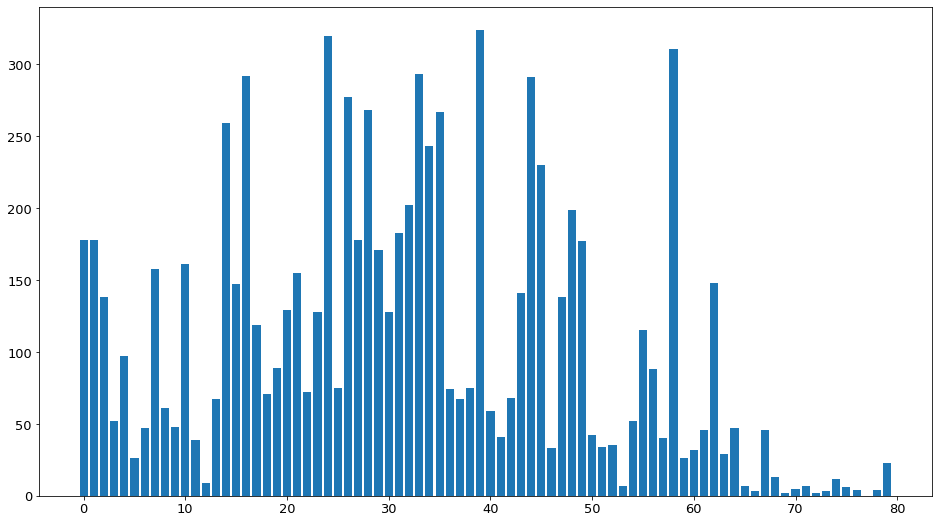

In [14]:
a_trans = train['Age']

plt.figure(figsize=(16, 9))
plt.bar(a_trans.unique()[0:80], a_trans.value_counts())  # 짝이 안맞아서 가장 분포가 적다고 생각되는 마지막 값 제거
plt.show()


# 특정하게 몰려있는 나이대의 패턴이 없다

In [15]:
train
# 지금하려고 하는건 냉동인간일 때 살아있는지에 대한 그래프, 피처 엔지니어링

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


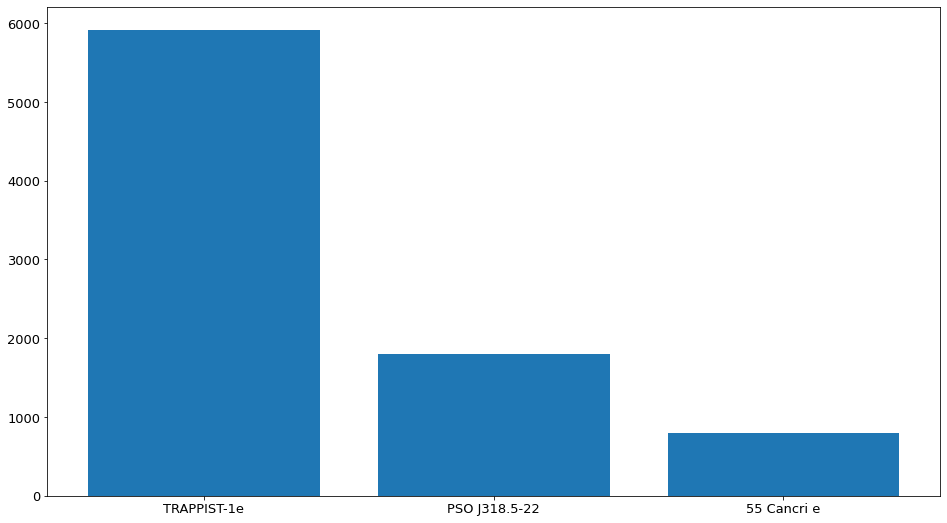

In [16]:
d_trans = train['Destination']

plt.figure(figsize=(16, 9))
plt.bar(d_trans.unique()[0:3], d_trans.value_counts())  # Nan 값으로 인한 분포도 오류 임의 처리
plt.show()
plt.show()

# 분포도에 따른 상관성 및 가설 검증이 가능할 것 같다.
# 가장 적은 55cancrie의 식비, 쇼핑비, VIP 상관성 분석 필요 있음 -> 이에 대한 transported 관계 확립

In [17]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [18]:
train.groupby('HomePlanet')['Transported'].count() / train['Transported'].count() * 100

HomePlanet
Earth     52.939146
Europa    24.513977
Mars      20.234672
Name: Transported, dtype: float64

In [19]:
train[(train['HomePlanet'] == 'Earth') & (train['Transported'] == True)].groupby('HomePlanet')['Transported'].count() /
train[train['Transported'] == True]['Transported'].count() * 100  # 살아남은 사람 중 Earth 비율

HomePlanet
Earth    44.563728
Name: Transported, dtype: float64

In [20]:
train[(train['HomePlanet'] == 'Europa') & (train['Transported'] == True)].groupby('HomePlanet')['Transported'].count() /
train[train['Transported'] == True]['Transported'].count() * 100  # 살아남은 사람 중 Europa 비율

HomePlanet
Europa    32.069438
Name: Transported, dtype: float64

In [21]:
train[(train['HomePlanet'] == 'Mars') & (train['Transported'] == True)].groupby('HomePlanet')['Transported'].count() /
train[train['Transported'] == True]['Transported'].count() * 100  # 살아남은 사람 중 Mars 비율

HomePlanet
Mars    21.014162
Name: Transported, dtype: float64

In [22]:
train[(train['HomePlanet'] == 'Earth') & (train['Transported'] == True)].groupby('HomePlanet')['Transported'].count() /
train[train['HomePlanet'] == 'Earth']['Transported'].count() * 100  # Earth 사람 중 살아남은 사람 비율

HomePlanet
Earth    42.394611
Name: Transported, dtype: float64

In [23]:
train[(train['HomePlanet'] == 'Europa') & (train['Transported'] == True)].groupby('HomePlanet')['Transported'].count() /
train[train['HomePlanet'] == 'Europa']['Transported'].count() * 100  # Europa 사람 중 살아남은 사람 비율

HomePlanet
Europa    65.884561
Name: Transported, dtype: float64

In [24]:
train[(train['HomePlanet'] == 'Mars') & (train['Transported'] == True)].groupby('HomePlanet')['Transported'].count() /
train[train['HomePlanet'] == 'Mars']['Transported'].count() * 100  # Mars 사람 중 살아남은 사람 비율

HomePlanet
Mars    52.302445
Name: Transported, dtype: float64

<AxesSubplot:xlabel='HomePlanet'>

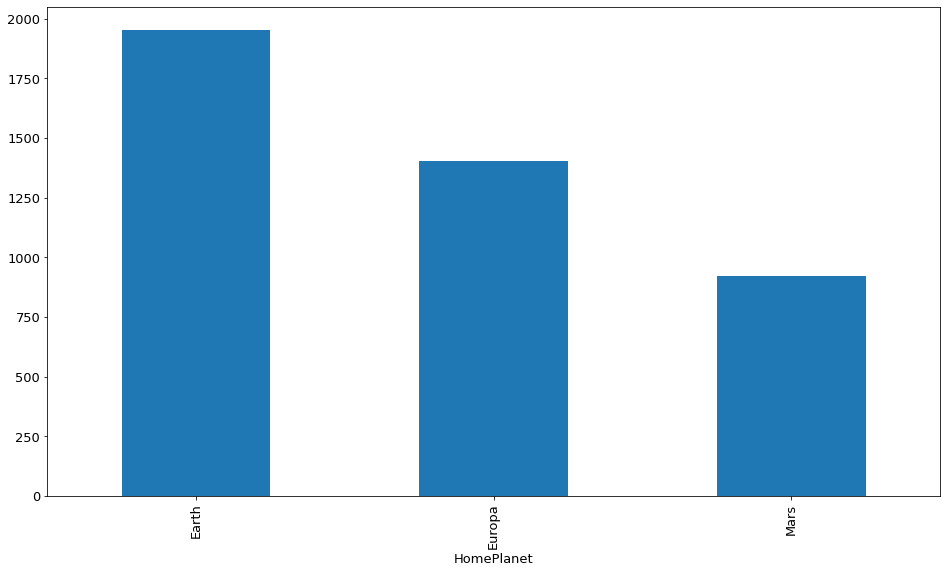

In [25]:
train[train['Transported'] == True].groupby('HomePlanet')['Transported'].count().plot.bar(figsize=(16, 9))

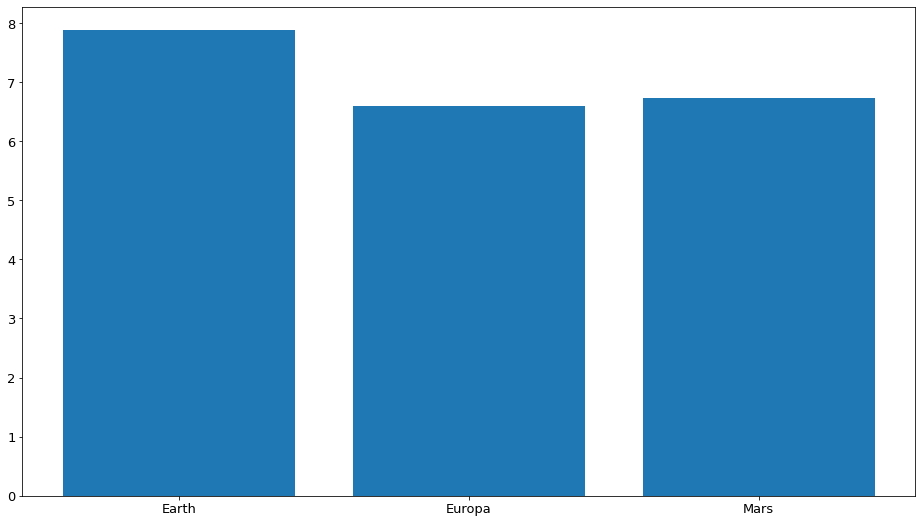

In [26]:
tc = np.log1p(train[train['Transported'] == False].groupby('HomePlanet')['Transported'].count())

plt.figure(figsize=(16, 9))
plt.bar(tc.index, tc)
plt.show()

In [27]:
print(train[train['Transported'] == True].groupby('HomePlanet')['Transported'].count())
print(train[train['Transported'] == False].groupby('HomePlanet')['Transported'].count())

HomePlanet
Earth     1951
Europa    1404
Mars       920
Name: Transported, dtype: int64
HomePlanet
Earth     2651
Europa     727
Mars       839
Name: Transported, dtype: int64


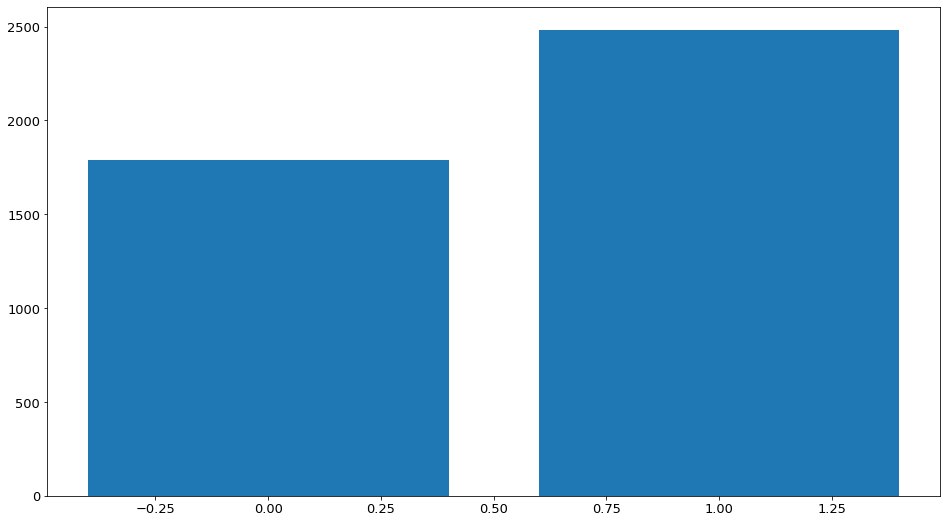

In [28]:
tc_s = train[train['Transported'] == True].groupby('CryoSleep')['CryoSleep'].count()

plt.figure(figsize=(16, 9))
plt.bar(tc_s.index, tc_s)
plt.show()

In [29]:
tc_s  # 살아남은 사람 중 냉동인간을 한 사람이 더 많다

CryoSleep
False    1789
True     2483
Name: CryoSleep, dtype: int64

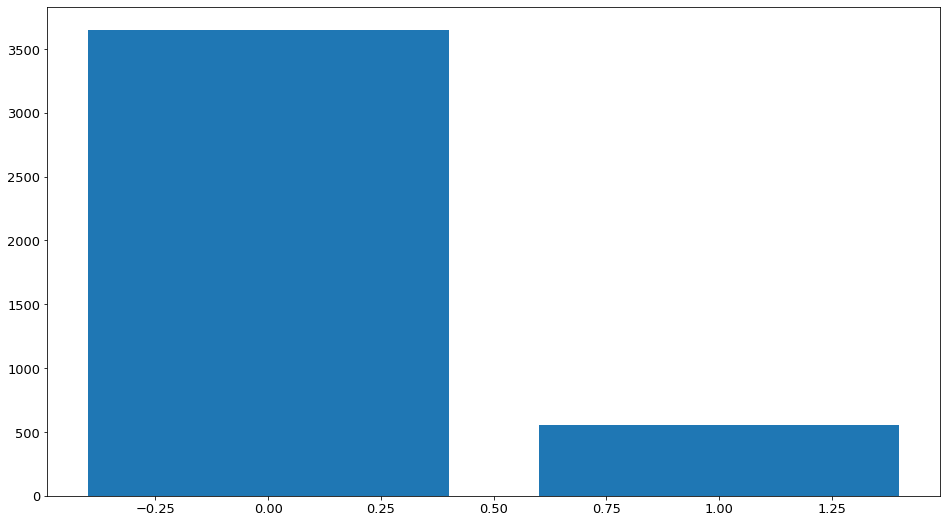

In [30]:
tc_s = train[train['Transported'] == False].groupby('CryoSleep')['CryoSleep'].count()

plt.figure(figsize=(16, 9))
plt.bar(tc_s.index, tc_s)
plt.show()

In [31]:
tc_s  # 죽은 사람 중에서는 냉동을 안한 사람이 매우 많다 그럼 냉동을 한 사람이 유리 하니까 이걸 이용해서 특정한 파생변수를 만든다 => VIP 중 냉동인간이 몇인지 확인하고 VIP가 살아남을 확률이 높은지, 죽을 확률이 높은지 확인하기

CryoSleep
False    3650
True      554
Name: CryoSleep, dtype: int64

In [32]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

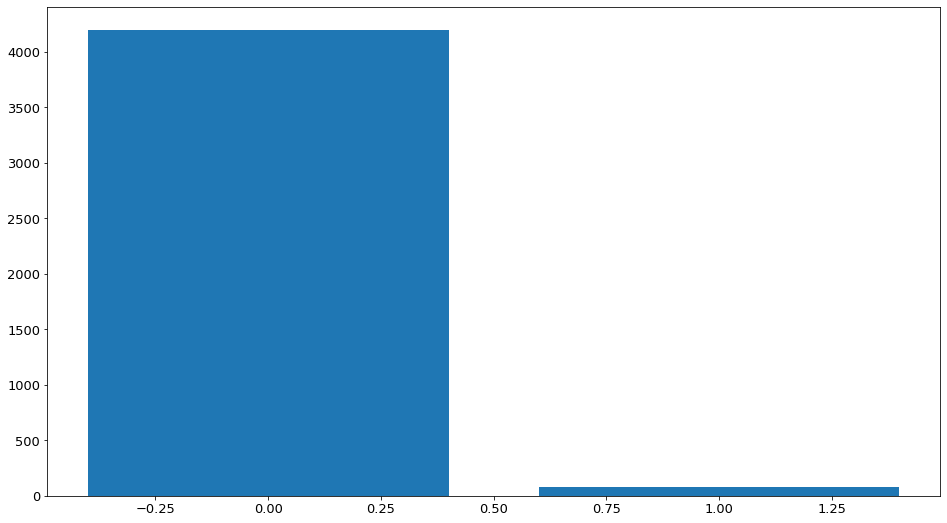

In [33]:
vct_s = train[train['Transported'] == True].groupby('VIP')['VIP'].count()

plt.figure(figsize=(16, 9))
plt.bar(vct_s.index, vct_s)
plt.show()

In [34]:
vct_s = train[train['Transported'] == True].groupby(['VIP', 'CryoSleep'])['VIP'].count()

In [35]:
vct_s  # 읿반 탑승객은 냉동한 사람이 더 많이 살았지만, VIP는 냉동 안한 사람이 더 많이 살았음

VIP    CryoSleep
False  False        1688
       True         2406
True   False          54
       True           21
Name: VIP, dtype: int64

<AxesSubplot:>

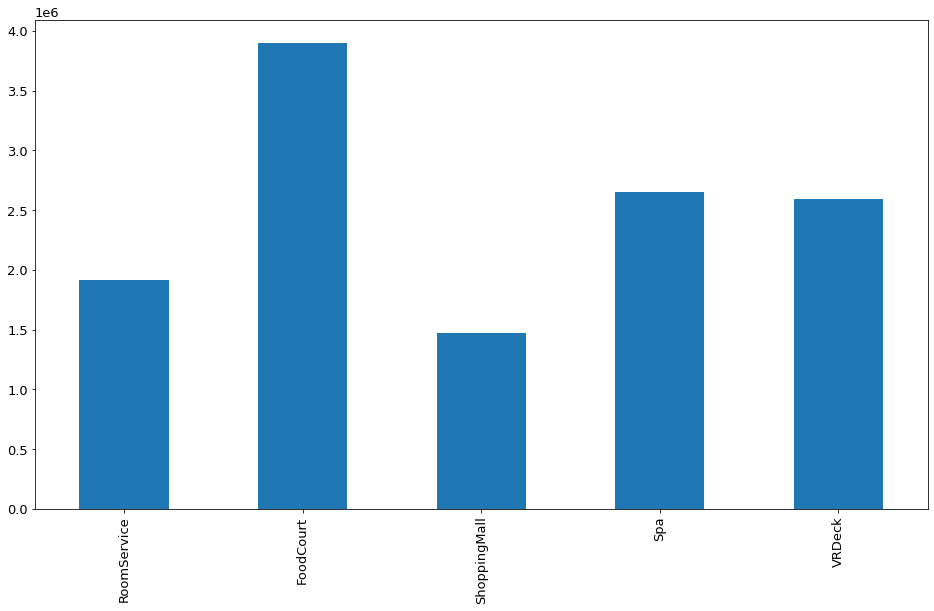

In [36]:
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum().plot.bar(figsize=(16, 9))

In [37]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<AxesSubplot:xlabel='HomePlanet,Transported'>

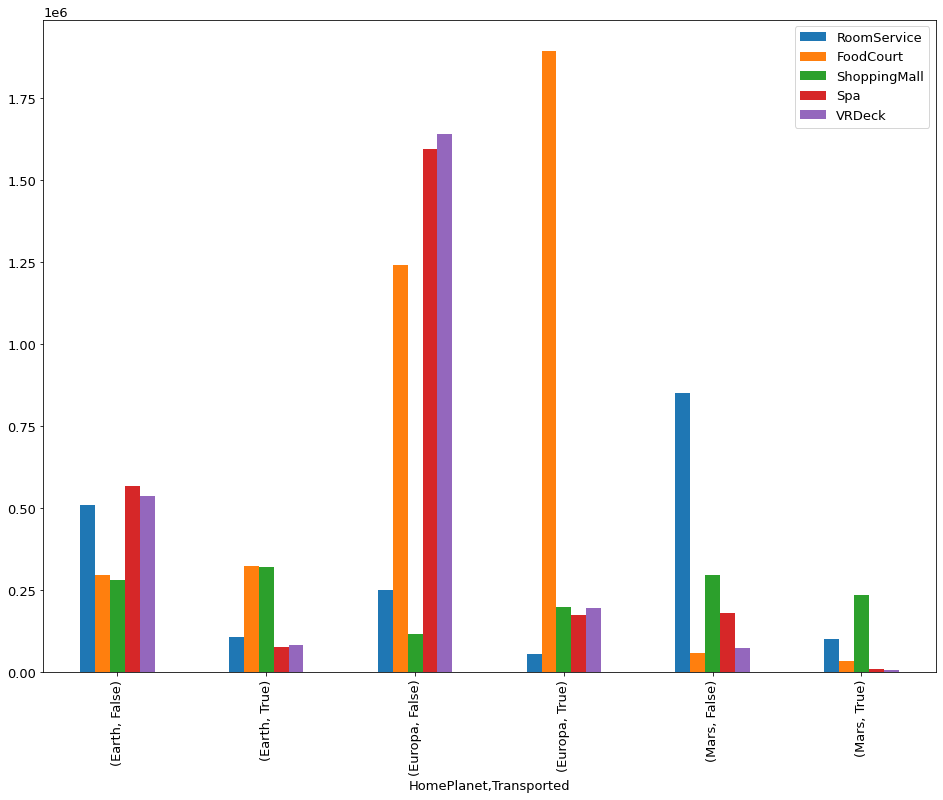

In [38]:
# 세워볼 수 있는 가정
# Europa 사람들이 비율로 따졌을 때 가장 많이 살아남았고, 살아남은 Europa 사람들은 FoodCourt를 많은 돈을 썼다.
# 사용횟 수는 Earth인이 많지만 총량은 Europa 사람이 훨씬 많다.
# 자주 이용하는 만큼 Europa 사람들이 Food Court를 이용하고 있었을 가능성이 있다.
# 사고 당시 Food Court 쪽은 사고 난 곳과 멀었을 가능성이 있다.
# 이걸 식으로 어떻게 표현 할 것인가?

# 푸드코드에 자주가는 유럽인은 차원이동이 되지 않았을 가능성이있다?

train.groupby(['HomePlanet', 'Transported'])[
    ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum().plot.bar(figsize=(16, 12))

In [39]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [74]:
train['Rank_CryoSleep'] = 1
test['Rank_CryoSleep'] = 1

In [75]:
# 이 부분을 어떻게 가중치화 시킬지를 생각해봐야 한다.

# train['Rank_CryoSleep']
# 일반 탑승객이고 냉동하면 1, VIP고 냉동 안하면 1
# 냉동인 상태의 인간이 여흥 거리를 얼마나 즐겼는지 확인핳기

train['Rank_CryoSleep'].loc[(train['VIP'] == False) & (train['CryoSleep'] == True)] = 2
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Rank_CryoSleep
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,2
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


In [76]:
# 이 부분을 어떻게 가중치화 시킬지를 생각해봐야 한다.

# train['Rank_CryoSleep']
# 일반 탑승객이고 냉동하면 1, VIP고 냉동 안하면 1
# 냉동인 상태의 인간이 여흥 거리를 얼마나 즐겼는지 확인핳기

test['Rank_CryoSleep'].loc[(test['VIP'] == False) & (test['CryoSleep'] == True)] = 2
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Rank_CryoSleep
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,2
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,2
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,2
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1


In [77]:
# 내일 변수 선정하고 마무리로 상관관계 탐색 후 가설 도메인 지식 기반 가설 세우기
# 다른 feature를 전처리하고 사용할 방안을 생각해보자
# 특정 값에 가중치 넣어주는걸 생각해보자

train_df = train[['CryoSleep', 'Destination', 'Age', 'VIP', 'HomePlanet', 'RoomService', 'FoodCourt',
                  'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]

# train_df = pd.get_dummies(train_df)
train_df

,CryoSleep,Destination,Age,VIP,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,TRAPPIST-1e,39.0,False,Europa,0.0,0.0,0.0,0.0,0.0,False
1,False,TRAPPIST-1e,24.0,False,Earth,109.0,9.0,25.0,549.0,44.0,True
2,False,TRAPPIST-1e,58.0,True,Europa,43.0,3576.0,0.0,6715.0,49.0,False
3,False,TRAPPIST-1e,33.0,False,Europa,0.0,1283.0,371.0,3329.0,193.0,False
4,False,TRAPPIST-1e,16.0,False,Earth,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,False,55 Cancri e,41.0,True,Europa,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,PSO J318.5-22,18.0,False,Earth,0.0,0.0,0.0,0.0,0.0,False
8690,False,TRAPPIST-1e,26.0,False,Earth,0.0,0.0,1872.0,1.0,0.0,True
8691,False,55 Cancri e,32.0,False,Europa,0.0,1049.0,0.0,353.0,3235.0,False


In [78]:
# 내일 변수 선정하고 마무리로 상관관계 탐색 후 가설 도메인 지식 기반 가설 세우기
# 다른 feature를 전처리하고 사용할 방안을 생각해보자
# 특정 값에 가중치 넣어주는걸 생각해보자

test_df = test[['CryoSleep', 'Destination', 'Age', 'VIP', 'HomePlanet', 'RoomService', 'FoodCourt',
                'ShoppingMall', 'Spa', 'VRDeck']]

# train_df = pd.get_dummies(train_df)


In [79]:
def get_used_food_weight(planet):
    if planet == 'Earth':
        return 2
    elif planet == 'Mars':
        return 1
    elif planet == 'Europa':
        return 4

    return 1


In [80]:
train_df['Food_Weight'] = train['HomePlanet'].map(lambda x: get_used_food_weight(x))  # 이 부분 에러 보고 처리 해주기
train_df['Food_Courts_accordingTo_Planet'] = np.around(np.power(train_df['FoodCourt'], train_df['Food_Weight']))

In [81]:
test_df['Food_Weight'] = train['HomePlanet'].map(lambda x: get_used_food_weight(x))  # 이 부분 에러 보고 처리 해주기
test_df['Food_Courts_accordingTo_Planet'] = np.around(np.power(test_df['FoodCourt'], test_df['Food_Weight']))

In [82]:
train_df['Destination'] = train_df['Destination'].fillna(0)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(0)
train_df['VIP'] = train_df['VIP'].fillna(1)
train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df[
    ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
# train_df['Rank_CryoSleep'] = np.power(train_df['Rank_CryoSleep'], )
train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].value_counts().index[0])
# feature engineering이 필요한 단계라는 것을 인지
#

train_df

,CryoSleep,Destination,Age,VIP,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Food_Weight,Food_Courts_accordingTo_Planet
0,False,TRAPPIST-1e,39.0,False,Europa,0.0,0.0,0.0,0.0,0.0,False,4,0.000000e+00
1,False,TRAPPIST-1e,24.0,False,Earth,109.0,9.0,25.0,549.0,44.0,True,2,8.100000e+01
2,False,TRAPPIST-1e,58.0,True,Europa,43.0,3576.0,0.0,6715.0,49.0,False,4,1.635272e+14
3,False,TRAPPIST-1e,33.0,False,Europa,0.0,1283.0,371.0,3329.0,193.0,False,4,2.709609e+12
4,False,TRAPPIST-1e,16.0,False,Earth,303.0,70.0,151.0,565.0,2.0,True,2,4.900000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,55 Cancri e,41.0,True,Europa,0.0,6819.0,0.0,1643.0,74.0,False,4,2.162135e+15
8689,True,PSO J318.5-22,18.0,False,Earth,0.0,0.0,0.0,0.0,0.0,False,2,0.000000e+00
8690,False,TRAPPIST-1e,26.0,False,Earth,0.0,0.0,1872.0,1.0,0.0,True,2,0.000000e+00
8691,False,55 Cancri e,32.0,False,Europa,0.0,1049.0,0.0,353.0,3235.0,False,4,1.210882e+12


In [83]:
test_df['Destination'] = test_df['Destination'].fillna(0)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(0)
test_df['VIP'] = test_df['VIP'].fillna(1)
test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df[
    ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
# train_df['Rank_CryoSleep'] = np.power(train_df['Rank_CryoSleep'], )
test_df['HomePlanet'] = test_df['HomePlanet'].fillna(test_df['HomePlanet'].value_counts().index[0])
# feature engineering이 필요한 단계라는 것을 인지
#

test_df

,CryoSleep,Destination,Age,VIP,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Food_Weight,Food_Courts_accordingTo_Planet
0,True,TRAPPIST-1e,27.000000,False,Earth,0.0,0.0,0.0,0.0,0.0,4,0.000000e+00
1,False,TRAPPIST-1e,19.000000,False,Earth,0.0,9.0,0.0,2823.0,0.0,2,8.100000e+01
2,True,55 Cancri e,31.000000,False,Europa,0.0,0.0,0.0,0.0,0.0,4,0.000000e+00
3,False,TRAPPIST-1e,38.000000,False,Europa,0.0,6652.0,0.0,181.0,585.0,4,1.957983e+15
4,False,TRAPPIST-1e,20.000000,False,Earth,10.0,0.0,635.0,0.0,0.0,2,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,TRAPPIST-1e,34.000000,False,Earth,0.0,0.0,0.0,0.0,0.0,2,0.000000e+00
4273,False,TRAPPIST-1e,42.000000,False,Earth,0.0,847.0,17.0,10.0,144.0,2,7.174090e+05
4274,True,55 Cancri e,28.658146,False,Mars,0.0,0.0,0.0,0.0,0.0,1,0.000000e+00
4275,False,0,28.658146,False,Europa,0.0,2680.0,0.0,0.0,523.0,4,5.158687e+13


In [84]:
train_df['Food_Courts_accordingTo_Planet'] = train_df['Food_Courts_accordingTo_Planet'].fillna(0)
test_df['Food_Courts_accordingTo_Planet'] = test_df['Food_Courts_accordingTo_Planet'].fillna(0)

In [85]:
train_df['CryoSleep'] = train_df['CryoSleep'].map({
    True: 1,
    False: 0
})

train_df['Destination'] = train_df['Destination'].map({
    'TRAPPIST-1e': 0,
    'PSO J318.5-22': 1,
    '55 Cancri e': 2
})

train_df['Transported'] = train_df['Transported'].map({
    True: 1,
    False: 0
})

train_df['VIP'] = train_df['VIP'].map({
    True: 1,
    False: 0
})

train_df['HomePlanet'] = train_df['HomePlanet'].map({
    'Earth': 1,
    'Mars': 2,
    'Europa': 4
})

train_df

,CryoSleep,Destination,Age,VIP,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Food_Weight,Food_Courts_accordingTo_Planet
0,0,0.0,39.0,0,4,0.0,0.0,0.0,0.0,0.0,0,4,0.000000e+00
1,0,0.0,24.0,0,1,109.0,9.0,25.0,549.0,44.0,1,2,8.100000e+01
2,0,0.0,58.0,1,4,43.0,3576.0,0.0,6715.0,49.0,0,4,1.635272e+14
3,0,0.0,33.0,0,4,0.0,1283.0,371.0,3329.0,193.0,0,4,2.709609e+12
4,0,0.0,16.0,0,1,303.0,70.0,151.0,565.0,2.0,1,2,4.900000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,2.0,41.0,1,4,0.0,6819.0,0.0,1643.0,74.0,0,4,2.162135e+15
8689,1,1.0,18.0,0,1,0.0,0.0,0.0,0.0,0.0,0,2,0.000000e+00
8690,0,0.0,26.0,0,1,0.0,0.0,1872.0,1.0,0.0,1,2,0.000000e+00
8691,0,2.0,32.0,0,4,0.0,1049.0,0.0,353.0,3235.0,0,4,1.210882e+12


In [86]:
test_df['CryoSleep'] = test_df['CryoSleep'].map({
    True: 1,
    False: 0
})

test_df['Destination'] = test_df['Destination'].map({
    'TRAPPIST-1e': 0,
    'PSO J318.5-22': 1,
    '55 Cancri e': 2
})

test_df['VIP'] = test_df['VIP'].map({
    True: 1,
    False: 0
})

test_df['HomePlanet'] = test_df['HomePlanet'].map({
    'Earth': 1,
    'Mars': 2,
    'Europa': 4
})

test_df

,CryoSleep,Destination,Age,VIP,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Food_Weight,Food_Courts_accordingTo_Planet
0,1,0.0,27.000000,0,1,0.0,0.0,0.0,0.0,0.0,4,0.000000e+00
1,0,0.0,19.000000,0,1,0.0,9.0,0.0,2823.0,0.0,2,8.100000e+01
2,1,2.0,31.000000,0,4,0.0,0.0,0.0,0.0,0.0,4,0.000000e+00
3,0,0.0,38.000000,0,4,0.0,6652.0,0.0,181.0,585.0,4,1.957983e+15
4,0,0.0,20.000000,0,1,10.0,0.0,635.0,0.0,0.0,2,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0.0,34.000000,0,1,0.0,0.0,0.0,0.0,0.0,2,0.000000e+00
4273,0,0.0,42.000000,0,1,0.0,847.0,17.0,10.0,144.0,2,7.174090e+05
4274,1,2.0,28.658146,0,2,0.0,0.0,0.0,0.0,0.0,1,0.000000e+00
4275,0,NaN,28.658146,0,4,0.0,2680.0,0.0,0.0,523.0,4,5.158687e+13


In [87]:
train_df.isna().sum()

CryoSleep                           0
Destination                       182
Age                                 0
VIP                                 0
HomePlanet                          0
RoomService                         0
FoodCourt                           0
ShoppingMall                        0
Spa                                 0
VRDeck                              0
Transported                         0
Food_Weight                         0
Food_Courts_accordingTo_Planet      0
dtype: int64

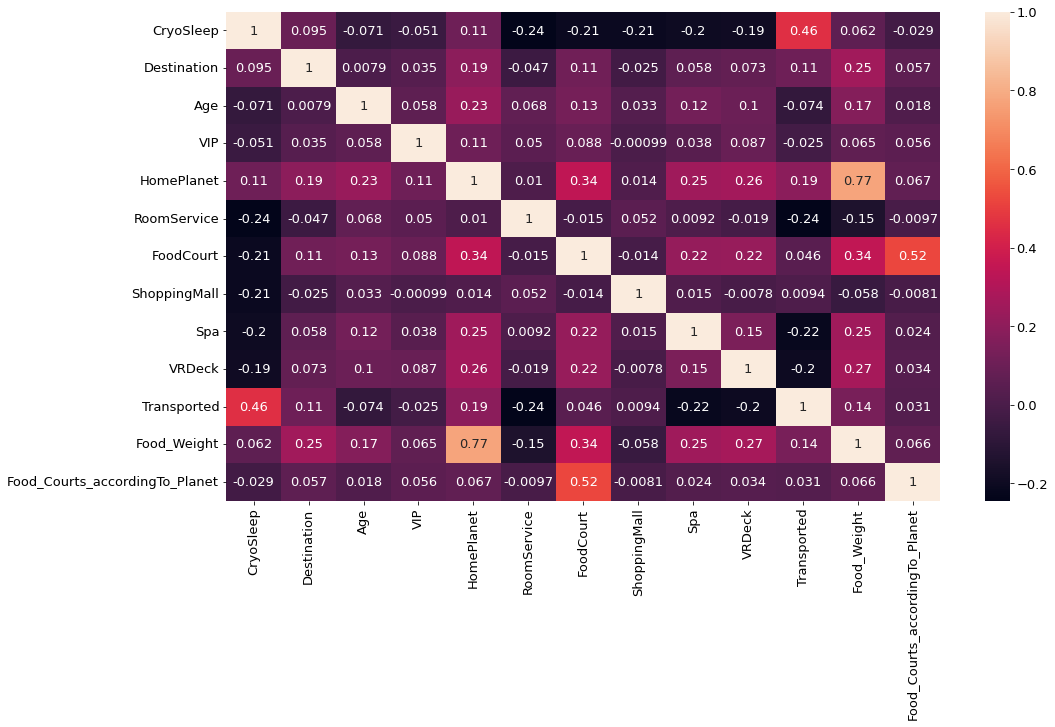

In [88]:
# Transported 된 사람과 여흥거리 4개와의 관계, Homeplanet과 여흥거리 4개와의 관계 -> 정확도가 왜 올라가지?

plt.figure(figsize=(16, 9))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [89]:
from sklearn.metrics import *


def get_clf_eval(y_valid, pred=None):
    accuracy = accuracy_score(y_valid, pred)
    precision = precision_score(y_valid, pred)
    recall = recall_score(y_valid, pred)
    f1 = f1_score(y_valid, pred)

    print('accuracy: {0: .4f}, precision: {1: .4f}, recall: {2: .4f}, f1: {3: .4f}'.format(accuracy,
                                                                                           precision,
                                                                                           recall,
                                                                                           f1,
                                                                                           ))


모델 선택 ( XGBClassifier )

C:\Users\Jun\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_data_in_leaf", "n_estimator", "num_iterations", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:17:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.8750359505320678
Valid: 0.7872340425531915
accuracy:  0.7872, precision:  0.7779, recall:  0.8098, f1:  0.7935


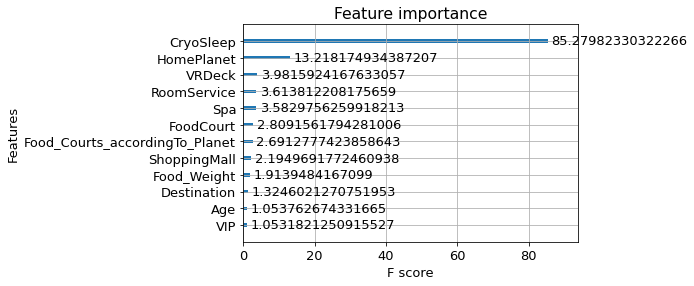

In [118]:
xgb_cl = XGBClassifier(
    max_depth=10,
    num_iterations=200,
    learning_rate=0.1,
    n_estimator=800,
    min_data_in_leaf=70,
    num_leaves=25,
)

X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_cl.fit(X_train, y_train, verbose=True)

y_pred = xgb_cl.predict(X_valid)

print('Train:', xgb_cl.score(X_train, y_train))
print('Valid:', xgb_cl.score(X_valid, y_valid))

plot_importance(xgb_cl, importance_type='gain')

get_clf_eval(y_valid=y_valid, pred=y_pred)

In [120]:
xgb_cl = XGBClassifier(
    max_depth=12,
    num_iterations=250,
    learning_rate=0.1,
    n_estimator=800,
    min_data_in_leaf=70,
    num_leaves=25,
)

X_train = train_df.drop(columns=['Transported'])
y_train = train_df['Transported']

X_test = test_df
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)


xgb_cl.fit(X_train, y_train, verbose=True)

y_pred = xgb_cl.predict(X_test)

print('Train:', xgb_cl.score(X_train, y_train))
# print('Valid:', xgb_cl.score(X_test, y_test))

plot_importance(xgb_cl, importance_type='gain')

# get_clf_eval(y_valid=y_test, pred=y_pred)

y_pred = pd.DataFrame(y_pred)[0].map({
    1: True,
    0: False
})

C:\Users\Jun\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "min_data_in_leaf", "n_estimator", "num_iterations", "num_leaves" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:17:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: Feature shape mismatch, expected: 12, got 13

In [102]:
y_pred

0        True
1       False
2        True
3        True
4       False
        ...  
4272     True
4273    False
4274     True
4275     True
4276    False
Name: 0, Length: 4277, dtype: bool

In [113]:
test['Transported'] = y_pred
test[['PassengerId', 'Transported']]

test[['PassengerId', 'Transported']].to_csv('./predict/submission.csv', index=False)

In [ ]:
xgb_cl_rf = XGBRFClassifier(
    max_depth=12,
    num_iterations=150,
    learning_rate=0.1,
    n_estimator=800,
    min_data_in_leaf=120,
    num_leaves=20,
)

X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

xgb_cl_rf.fit(X_train, y_train)

xgb_cl_rf.predict(X_valid)
print(xgb_cl_rf.score(X_train, y_train))
print(xgb_cl_rf.score(X_valid, y_valid))

plot_importance(xgb_cl_rf, importance_type='gain')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

xgb_cl_dtc = DecisionTreeClassifier()

X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

params = {
    'max_depth': [6, 8, 10, 12, 14],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],

}

grid_tree = GridSearchCV(xgb_cl_dtc, param_grid=params, cv=10, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters :', grid_tree.best_params_)
print('best score :', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_valid)

get_clf_eval(y_valid, pred)